In [0]:
import pandas as pd
import zipfile
from matplotlib import pyplot as plt
import numpy as np

In [2]:
principals_title = pd.read_csv(r'https://datasets.imdbws.com/title.principals.tsv.gz', sep = '\t')
principals_title.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [3]:
crew_title = pd.read_csv(r'https://datasets.imdbws.com/title.crew.tsv.gz', sep = '\t')
crew_title.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [4]:
name_basics = pd.read_csv(r'https://datasets.imdbws.com/name.basics.tsv.gz', sep = '\t')
name_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0043044,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0071877,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0057345,tt0054452,tt0059956,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0072562,tt0078723,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0060827,tt0050986,tt0083922,tt0050976"


In [5]:
rating_title = pd.read_csv(r'https://datasets.imdbws.com/title.ratings.tsv.gz', sep = '\t')
rating_title.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1613
1,tt0000002,6.0,197
2,tt0000003,6.5,1292
3,tt0000004,6.1,121
4,tt0000005,6.1,2067


In [6]:
#keeping only those having number of votes greater than 50
rating_title = rating_title[rating_title.numVotes>=50]
rating_title

,tconst,averageRating,numVotes
0,tt0000001,5.6,1613
1,tt0000002,6.0,197
2,tt0000003,6.5,1292
3,tt0000004,6.1,121
4,tt0000005,6.1,2067
...,...,...,...
1041173,tt9915912,7.3,71
1041182,tt9916200,8.4,153
1041183,tt9916204,8.2,177
1041188,tt9916380,9.1,101


In [7]:
rating_title=rating_title.drop('numVotes',axis=1) #dropping numvotes
rating_title

,tconst,averageRating
0,tt0000001,5.6
1,tt0000002,6.0
2,tt0000003,6.5
3,tt0000004,6.1
4,tt0000005,6.1
...,...,...
1041173,tt9915912,7.3
1041182,tt9916200,8.4
1041183,tt9916204,8.2
1041188,tt9916380,9.1


In [8]:
actor=principals_title[principals_title.category=='actor'] #keeping only actors from category
actor=actor[['tconst','nconst']] #takinh only indexs of name and titles
actor.reset_index(inplace=True) #due to happpazard index resetting indexes
actor=actor.drop('index',axis=1) #dropping happazards indexes
actor.columns=['tconst','actor'] # renaming nconst as actors as they are constants of actors
actor

,tconst,actor
0,tt0000005,nm0443482
1,tt0000005,nm0653042
2,tt0000007,nm0179163
3,tt0000007,nm0183947
4,tt0000008,nm0653028
...,...,...
9085574,tt9916852,nm5519557
9085575,tt9916852,nm8825009
9085576,tt9916856,nm10538646
9085577,tt9916880,nm1483166


In [9]:
director = crew_title.drop('writers', axis = 1)  #not required writers
director=director.loc[director['directors']!='\\N'] # removing null values
director

,tconst,directors
0,tt0000001,nm0005690
1,tt0000002,nm0721526
2,tt0000003,nm0721526
3,tt0000004,nm0721526
4,tt0000005,nm0005690
...,...,...
6812189,tt9916848,"nm5519454,nm5519375"
6812190,tt9916850,"nm5519375,nm5519454"
6812191,tt9916852,"nm5519454,nm5519375"
6812192,tt9916856,nm10538645


In [10]:
act_dir=actor.merge(director,how='inner',left_on='tconst',right_on='tconst')
act_dir

,tconst,actor,directors
0,tt0000005,nm0443482,nm0005690
1,tt0000005,nm0653042,nm0005690
2,tt0000007,nm0179163,"nm0005690,nm0374658"
3,tt0000007,nm0183947,"nm0005690,nm0374658"
4,tt0000008,nm0653028,nm0005690
...,...,...,...
7131794,tt9916852,nm5519557,"nm5519454,nm5519375"
7131795,tt9916852,nm8825009,"nm5519454,nm5519375"
7131796,tt9916856,nm10538646,nm10538645
7131797,tt9916880,nm1483166,nm0996406


In [11]:
act_dir = act_dir.merge(rating_title,how='inner',left_on='tconst',right_on='tconst')
act_dir

,tconst,actor,directors,averageRating
0,tt0000005,nm0443482,nm0005690,6.1
1,tt0000005,nm0653042,nm0005690,6.1
2,tt0000007,nm0179163,"nm0005690,nm0374658",5.4
3,tt0000007,nm0183947,"nm0005690,nm0374658",5.4
4,tt0000008,nm0653028,nm0005690,5.4
...,...,...,...,...
783691,tt9916200,nm0004857,nm0000655,8.4
783692,tt9916200,nm0001018,nm0000655,8.4
783693,tt9916204,nm0004857,nm0615069,8.2
783694,tt9916204,nm0001018,nm0615069,8.2


In [12]:
act_dir.describe()

,averageRating
count,783696.000000
mean,6.820906
std,1.376271
min,1.000000
25%,6.100000
50%,7.100000
75%,7.800000
max,10.000000


In [13]:
act_dir=act_dir[act_dir.averageRating==10] # keeping only highest ratings
act_dir

,tconst,actor,directors,averageRating
389779,tt0824357,nm2323012,nm2324123,10.0
389780,tt0824357,nm2324123,nm2324123,10.0
389781,tt0824357,nm1548648,nm2324123,10.0
399511,tt0880501,nm1352252,nm2324123,10.0
399512,tt0880501,nm2317950,nm2324123,10.0
...,...,...,...,...
735085,tt7266720,nm0002350,nm1900160,10.0
735086,tt7266720,nm2418976,nm1900160,10.0
735087,tt7266720,nm1170302,nm1900160,10.0
745279,tt7697654,nm1324844,"nm7237244,nm3208397",10.0


In [14]:
dirt = pd.DataFrame(act_dir.directors.str.split(',').tolist(), index=act_dir.tconst).stack() #finally splitting actors with multiple directors
dirt = dirt.reset_index()[['tconst',0]] 
dirt.columns = [ 'tconst', 'directors']
dirt=dirt.drop_duplicates(ignore_index=True)
dirt

,tconst,directors
0,tt0824357,nm2324123
1,tt0880501,nm2324123
2,tt10466884,nm8110372
3,tt10471404,nm10656343
4,tt1069840,nm0035106
5,tt11183556,nm11085154
6,tt11207902,nm11096630
7,tt11281576,nm11128343
8,tt11284638,nm11128343
9,tt11284848,nm11128343


In [15]:
act_dir=act_dir.drop('directors',axis=1) #removing directors
act_dir = act_dir.merge(dirt,how='inner',left_on='tconst',right_on='tconst') #merging the new one
act_dir

,tconst,actor,averageRating,directors
0,tt0824357,nm2323012,10.0,nm2324123
1,tt0824357,nm2324123,10.0,nm2324123
2,tt0824357,nm1548648,10.0,nm2324123
3,tt0880501,nm1352252,10.0,nm2324123
4,tt0880501,nm2317950,10.0,nm2324123
...,...,...,...,...
77,tt7266720,nm1170302,10.0,nm1900160
78,tt7697654,nm1324844,10.0,nm7237244
79,tt7697654,nm1324844,10.0,nm3208397
80,tt7697654,nm4885148,10.0,nm7237244


In [16]:
new_ac_di = ((act_dir.drop('tconst',axis=1)).groupby(by=['actor','directors'],as_index=False).count())
new_ac_di.rename(columns={"averageRating":"Count_10"},inplace=True)
new_ac_di=new_ac_di.sort_values(by='Count_10',ascending=False,ignore_index=True)
new_ac_di

,actor,directors,Count_10
0,nm9676789,nm11128343,7
1,nm0000893,nm0035106,4
2,nm0492226,nm0035106,4
3,nm11128343,nm11128343,4
4,nm0805189,nm0035106,4
...,...,...,...
56,nm11085156,nm11085154,1
57,nm11131031,nm11128343,1
58,nm0000274,nm0440105,1
59,nm11407115,nm11096630,1


In [17]:
new_ac_di.describe()

,Count_10
count,61.000000
mean,1.344262
std,1.062783
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,7.000000


In [20]:
new_pair=new_ac_di[new_ac_di['Count_10']>1]
new_pair

,actor,directors,Count_10
0,nm9676789,nm11128343,7
1,nm0000893,nm0035106,4
2,nm0492226,nm0035106,4
3,nm11128343,nm11128343,4
4,nm0805189,nm0035106,4
5,nm11131138,nm11128343,2
6,nm1548648,nm2324123,2
7,nm11130944,nm11128343,2


In [21]:
name_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0043044,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0071877,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0057345,tt0054452,tt0059956,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0072562,tt0078723,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0060827,tt0050986,tt0083922,tt0050976"


In [22]:
name = name_basics[['nconst','primaryName']]
name

,nconst,primaryName
0,nm0000001,Fred Astaire
1,nm0000002,Lauren Bacall
2,nm0000003,Brigitte Bardot
3,nm0000004,John Belushi
4,nm0000005,Ingmar Bergman
...,...,...
10098197,nm9993714,Romeo del Rosario
10098198,nm9993716,Essias Loberg
10098199,nm9993717,Harikrishnan Rajan
10098200,nm9993718,Aayush Nair


In [23]:
new_pair2=new_pair.merge(name,left_on='actor',right_on='nconst',)
new_pair2=new_pair2.drop('actor',axis=1)
new_pair2=new_pair2.drop('nconst',axis=1)
new_pair2.rename(columns={'primaryName':'actor'},inplace = True)
new_pair2

,directors,Count_10,actor
0,nm11128343,7,Altar Gültekin
1,nm0035106,4,Ed Begley Jr.
2,nm0035106,4,Zachary La Voy
3,nm11128343,4,Hazar Deniz BG
4,nm0035106,4,Max Elliott Slade
5,nm11128343,2,Zerdest Duruskan
6,nm2324123,2,Henrique Couto
7,nm11128343,2,Memet Roj


In [24]:
new_pair2=new_pair2.merge(name,how='inner',left_on='directors',right_on='nconst',)
new_pair2=new_pair2.drop('directors',axis=1)
new_pair2=new_pair2.drop('nconst',axis=1)
new_pair2.rename(columns={'primaryName':'directors'}, inplace = True)
new_pair2

,Count_10,actor,directors
0,7,Altar Gültekin,Hazar Deniz BG
1,4,Hazar Deniz BG,Hazar Deniz BG
2,2,Zerdest Duruskan,Hazar Deniz BG
3,2,Memet Roj,Hazar Deniz BG
4,4,Ed Begley Jr.,Allan Arkush
5,4,Zachary La Voy,Allan Arkush
6,4,Max Elliott Slade,Allan Arkush
7,2,Henrique Couto,Steve Rudzinski


In [25]:
new_pair2=new_pair2.sort_values(by='Count_10',ignore_index=True,ascending=False)
new_pair2

,Count_10,actor,directors
0,7,Altar Gültekin,Hazar Deniz BG
1,4,Hazar Deniz BG,Hazar Deniz BG
2,4,Ed Begley Jr.,Allan Arkush
3,4,Zachary La Voy,Allan Arkush
4,4,Max Elliott Slade,Allan Arkush
5,2,Zerdest Duruskan,Hazar Deniz BG
6,2,Memet Roj,Hazar Deniz BG
7,2,Henrique Couto,Steve Rudzinski


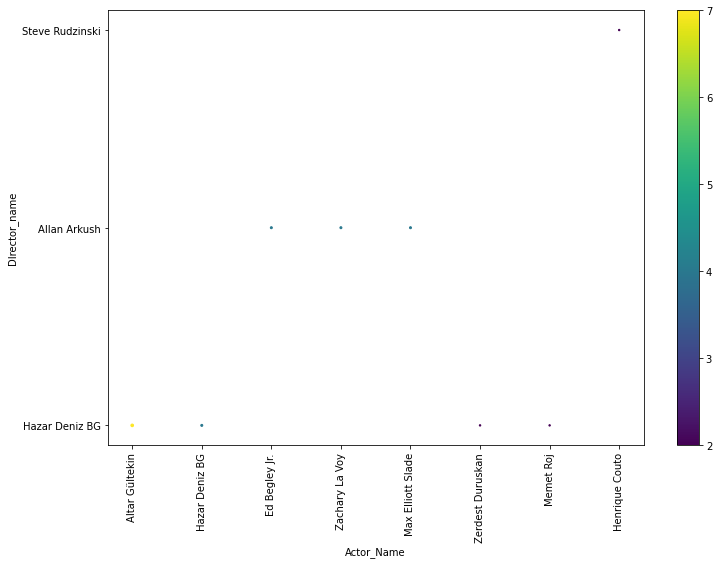

In [26]:
plt.figure(figsize=(12,8))
sc=plt.scatter(new_pair2.actor,new_pair2.directors,s=new_pair2.Count_10,c=new_pair2.Count_10)
plt.colorbar(sc)
plt.xticks(rotation=90)
plt.xlabel("Actor_Name")
plt.ylabel("DIrector_name")
plt.show()